In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    #line y=b0+b1*x
    def __init__(self,x,y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b0=0
        self.b1=0
        self._checkNumberOfElement=30
        self._error=[]
        self._numberOfIterationHappened=0
        self._alpha=0.01
        self._maximumErrorValueStored=100
        
    def fit(self):
        self._gradientDescent()
        self.ynew=np.add(self.b0,self.b1*np.array(self.x))
        pass
    
    def _gradientDescent(self):
        #this loop should run till the error is < precision
        while self._checkConverge()==False:
            self.b0=self.b0-self._alpha*self._calculateErrorInb0()
            self.b1-=self._alpha*self._calculateErrorInb1()
            self._numberOfIterationHappened+=+1
            if self._numberOfIterationHappened>=self._maximumErrorValueStored:
                self._error=self._error[-self._checkNumberOfElement:]
                
      
    def _checkConverge(self):
        yhat=np.add(self.b0,self.b1*np.array(self.x))
        error=np.sum(np.square(np.subtract(self.y,yhat)))/len(self.y)
        self._error.append(error)
        
        temp=self._error[-self._checkNumberOfElement:]
        
        if self._checkIfAllSame(temp)==False  or self._numberOfIterationHappened<self._checkNumberOfElement:
            return False
        else:
            return True
        
    def _checkIfAllSame(self,temp):
        return all(x==temp[0] for x in temp)
    
    def _calculateErrorInb1(self):
        yhat=np.add(self.b0,self.b1*np.array(self.x))
        return np.sum(np.multiply(np.subtract(yhat,self.y),self.x))/len(self.y)
    
        pass
    
    def _calculateErrorInb0(self):
        #x is a list
        yhat=np.add(self.b0,self.b1*np.array(self.x))
        return np.sum(np.subtract(yhat,self.y))/len(self.y)

In [3]:
df=pd.read_csv("data/cdata.csv")
df.sample(3)

,x,y
4,3,-2091
2,2,-1560
9,6,-4163


In [4]:
x=np.array(df['x'])
y=np.array(df['y'])


In [5]:
model=LinearRegression(x,y)
model.fit()

In [6]:
model.b0

-569.60169491522606

In [7]:
model.b1

-530.9067796610218

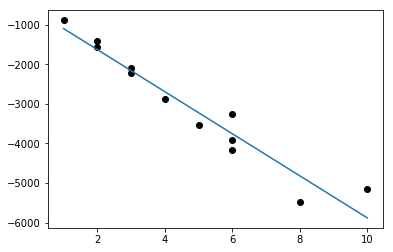

In [8]:
plt.scatter(x,y,color="black")
plt.plot(x,model.ynew)
plt.show()